### Set up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sweetviz as sv
import plotly.express as px
import warnings
from utils.function import load_google_sheet_to_df



# Ignorar todos los warnings
warnings.filterwarnings("ignore")


c:\Users\andres.bircher\anaconda3\envs\Tesis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset

In [46]:
df = pd.read_excel("Blue oficial.xlsx")

df['Fecha inscripcion'] = pd.to_datetime(df['Fecha inscripcion'])


In [2]:
### Function to get the dataset from gsheet

# df = load_google_sheet_to_df(spreadsheet_id = '1iTWHjvdUy0fOhw9taqSt5kv954lgUFNkSre8wUJC0TE' 
#                         , sheet_name = 'pacientes' 
#                         , data_range=None)

In [4]:
print('Filas y columnas')
print(df.shape)  #
print('-------------------------')
print('Lista las columnas')
print(df.columns)  # 

Filas y columnas
(845, 18)
-------------------------
Lista las columnas
Index(['Fecha inscripcion', 'Index', 'EDAD', 'ESTUDIO', 'MOTIVO 1', 'MOTIVO 2',
       'DOMICILIO', 'OBRA SOCIAL', 'SOLICITANTE', 'FECHA PEDIDO', 'ASA',
       'FECHA ASA', 'CARDIOLOGICO', 'FECHA CARDIOLOGICO', 'LABORATORIO',
       'FECHA LABORATORIO', 'codigo paper', 'score'],
      dtype='object')


In [5]:
df.head()  # Resumen estadístico para variables numéricas

,Fecha inscripcion,Index,EDAD,ESTUDIO,MOTIVO 1,MOTIVO 2,DOMICILIO,OBRA SOCIAL,SOLICITANTE,FECHA PEDIDO,ASA,FECHA ASA,CARDIOLOGICO,FECHA CARDIOLOGICO,LABORATORIO,FECHA LABORATORIO,codigo paper,score
0,1/1/2022,1,56,VEDA,Enfermedad Celiaca,,,,,,,,,,,,21,
1,1/1/2022,2,50,DOBLE,Screening varices esofagicas,Disfagia,,,,,,,,,,,15,
2,1/1/2022,3,47,DOBLE,ERGE,Mucorrea,,,,,,,,,,,22,
3,1/1/2022,4,37,VCC,Proctorragia,,,,,,,,,,,,12,
4,1/1/2022,5,61,DOBLE,Anemia,,,,,,,,,,,,13,


In [6]:
print(df.info())  # Tipo de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fecha inscripcion   845 non-null    object
 1   Index               845 non-null    object
 2   EDAD                845 non-null    object
 3   ESTUDIO             845 non-null    object
 4   MOTIVO 1            845 non-null    object
 5   MOTIVO 2            845 non-null    object
 6   DOMICILIO           845 non-null    object
 7   OBRA SOCIAL         845 non-null    object
 8   SOLICITANTE         845 non-null    object
 9   FECHA PEDIDO        845 non-null    object
 10  ASA                 845 non-null    object
 11  FECHA ASA           845 non-null    object
 12  CARDIOLOGICO        845 non-null    object
 13  FECHA CARDIOLOGICO  845 non-null    object
 14  LABORATORIO         845 non-null    object
 15  FECHA LABORATORIO   845 non-null    object
 16  codigo paper        845 no

In [50]:
print(df.describe())  # Resumen estadístico para variables numéricas

                   Fecha inscripcion       Index        EDAD
count                            857  857.000000  856.000000
mean   2023-07-06 00:21:50.618436096  434.311552   57.998832
min              2022-01-01 00:00:00    1.000000    0.000000
25%              2022-01-01 00:00:00  216.000000   51.000000
50%              2023-11-08 00:00:00  435.000000   59.000000
75%              2024-05-22 00:00:00  651.000000   67.000000
max              2024-12-11 00:00:00  870.000000   89.000000
std                              NaN  251.718263   13.809608


In [51]:
# #Cantidad de Nulls

# null_df = pd.DataFrame([df.isnull().sum().sort_values(ascending=False)])

# plt.figure(figsize=(8, 6))  # Tamaño de la figura
# sns.barplot( data=null_df, orient='h')
# plt.xlabel("Cantidad")       # Etiqueta del eje X
# plt.ylabel("Categoría")     # Etiqueta del eje Y
# plt.title("Valores Nullos dentro del Dataset")
# plt.show()



# Crear DataFrame de nulls
null_df = pd.DataFrame(df.isnull().sum().sort_values(ascending=True)).reset_index()
null_df.columns = ['Categoría', 'Cantidad']  # Renombrar las columnas

# Gráfico interactivo con Plotly
fig = px.bar(null_df, x='Cantidad', y='Categoría', title="Valores Nulos dentro del Dataset", text='Cantidad')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

### Variables Categóricas

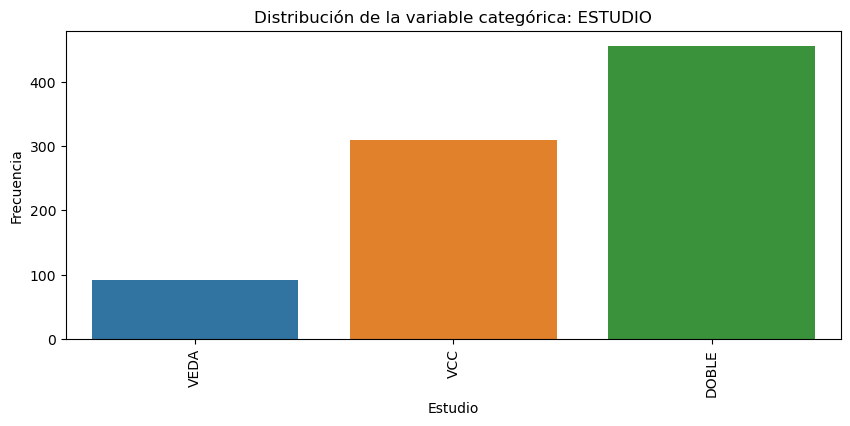

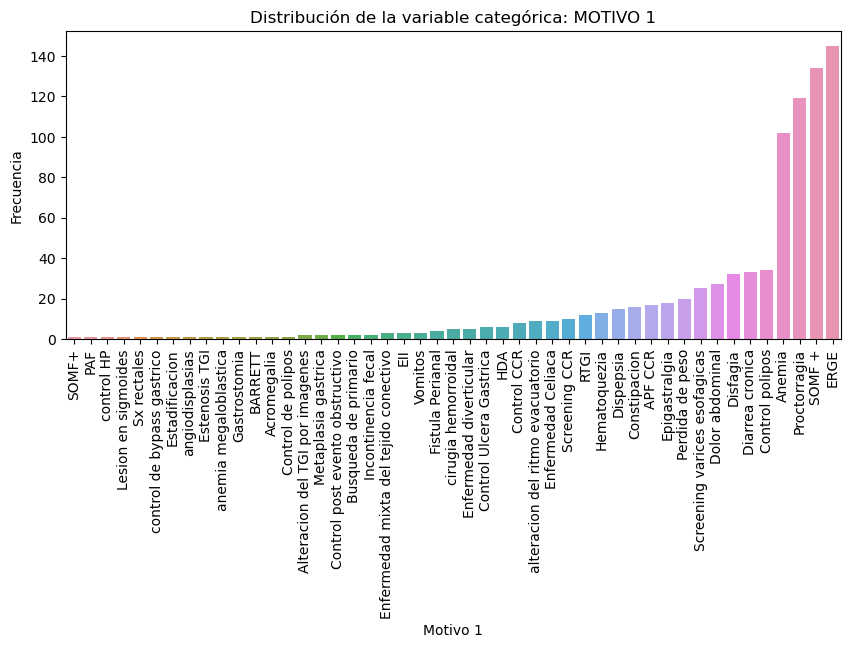

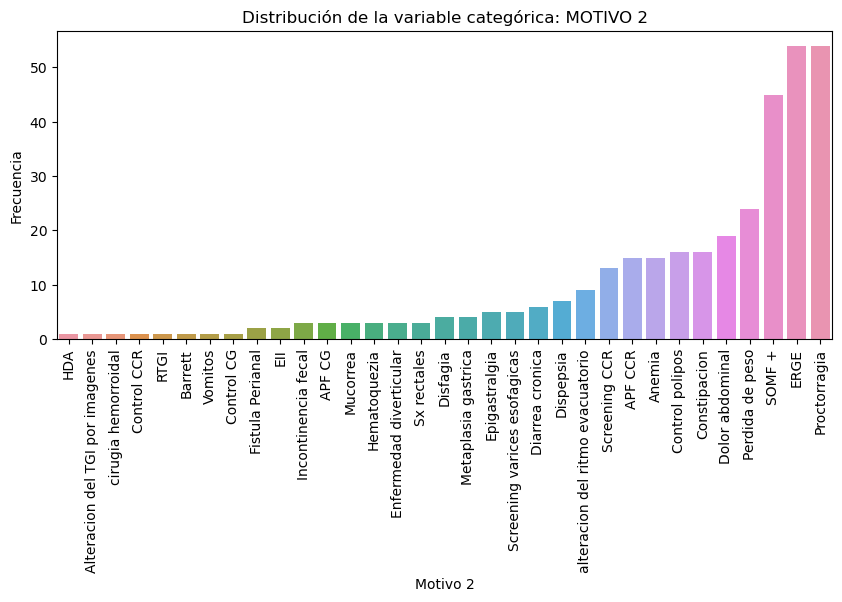

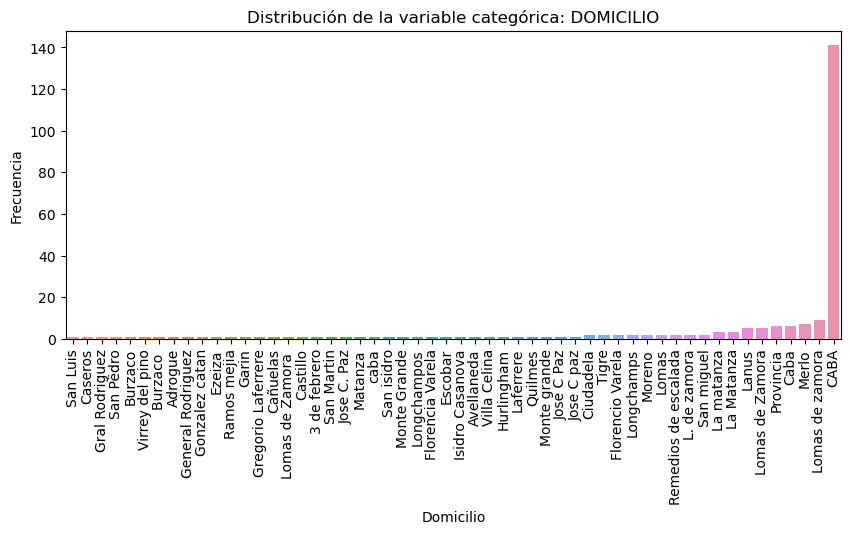

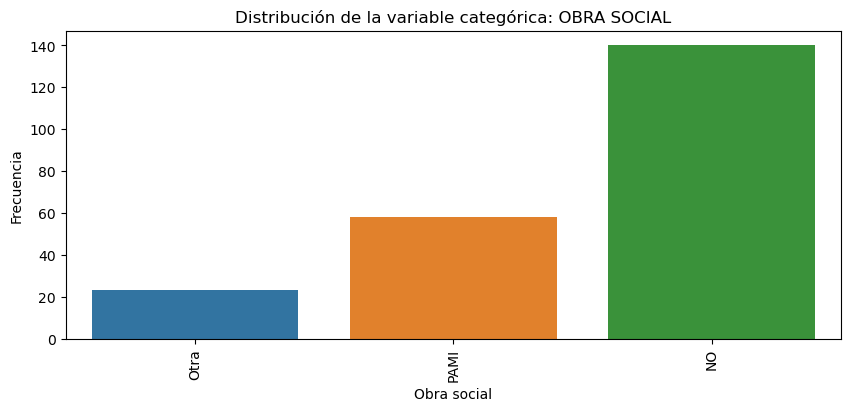

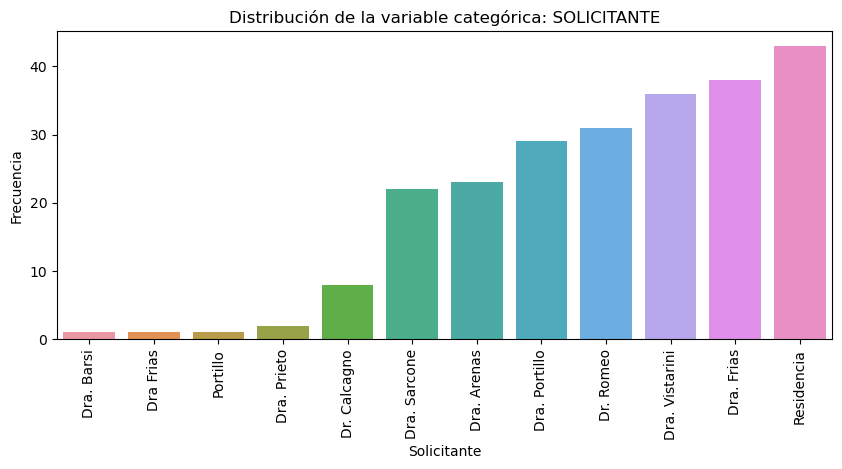

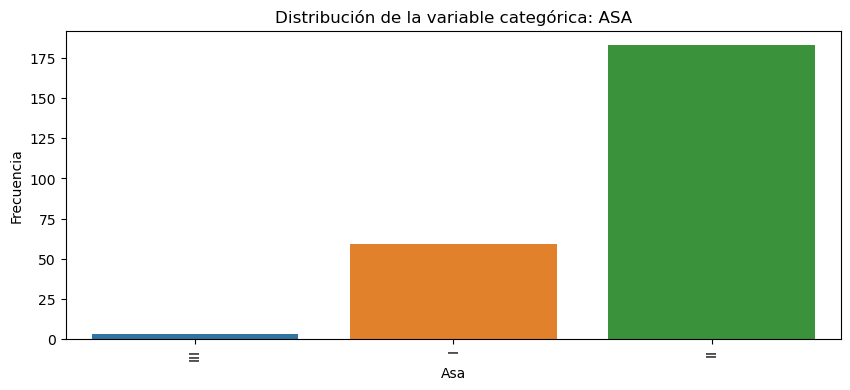

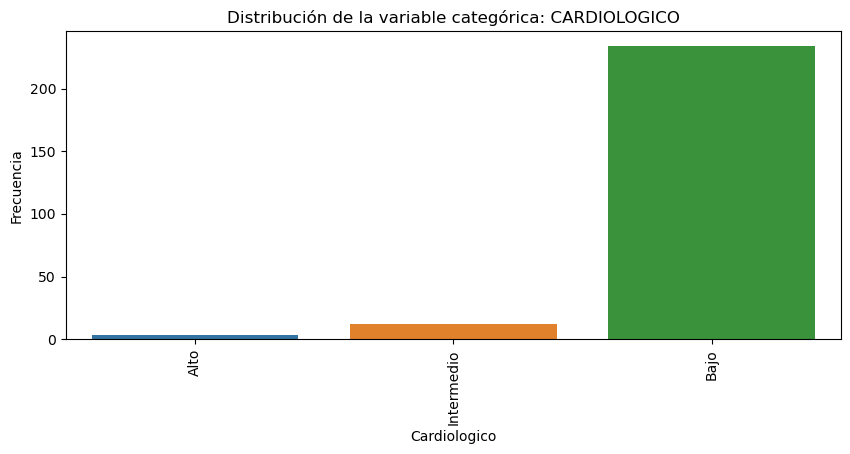

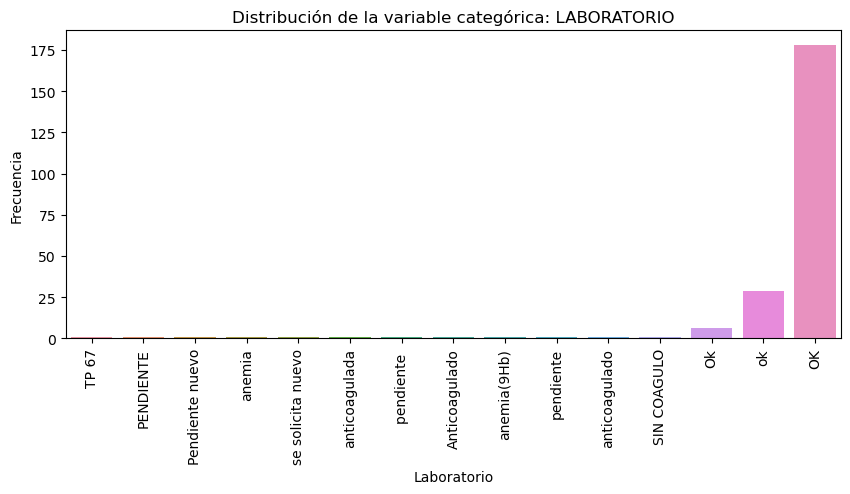

In [52]:

# Filtrar solo las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
# Descartamos las fechas 
categorical_columns = [col for col in categorical_columns if 'fecha' not in col.lower()]

# Loop para generar un countplot para cada variable categórica
for col in categorical_columns:
    # Ordenar las categorías por frecuencia ascendente
    order = df[col].value_counts().sort_values(ascending=True).index
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=order)
    plt.xlabel(col.capitalize())
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de la variable categórica: {col}")
    plt.xticks(rotation=90)
    plt.show()

### Variables Continuas

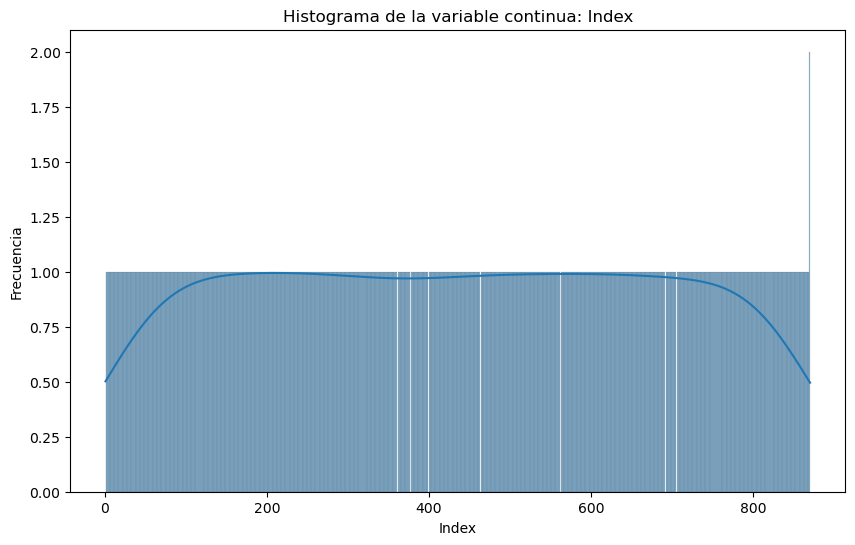

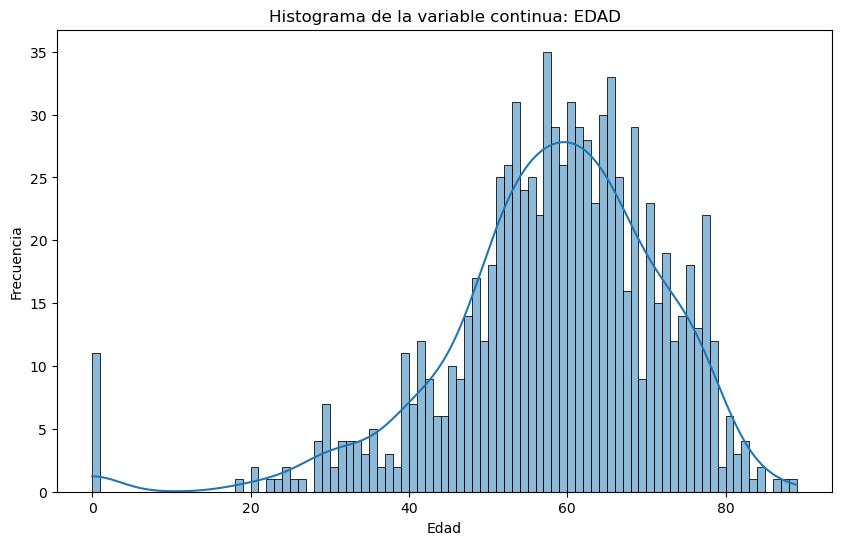

In [53]:

# Filtrar solo las columnas continuas (numéricas)
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Asegurarse de que "index" no esté en las columnas continuas
continuous_columns = [col for col in continuous_columns if col != 'index']

# Loop para generar un histograma para cada variable continua
for col in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col],binwidth=1, kde=True)  # Puedes ajustar el número de bins
    plt.xlabel(col.capitalize())
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de la variable continua: {col}")
    plt.show()

### Combinando Variables Categoricas con Continuas

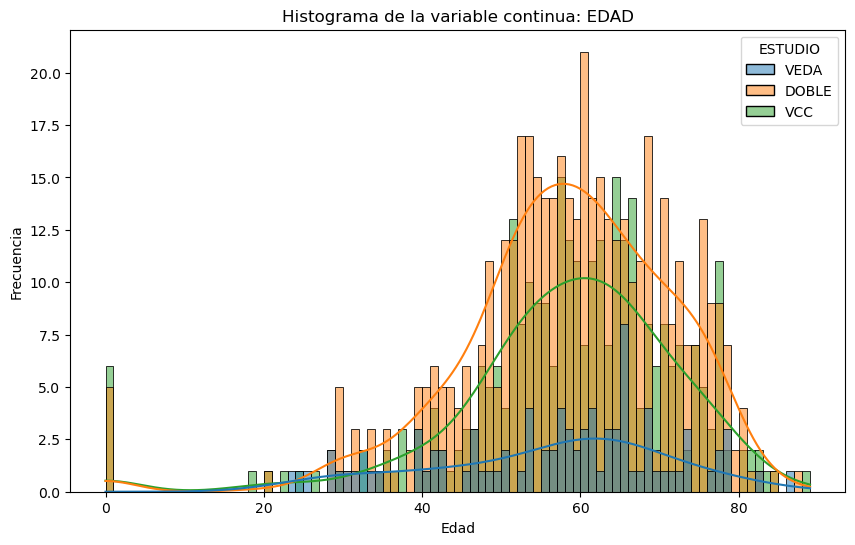

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df[['EDAD','ESTUDIO']],x='EDAD', hue='ESTUDIO',binwidth=1, kde=True) 
plt.xlabel(col.capitalize())
plt.ylabel("Frecuencia")
plt.title(f"Histograma de la variable continua: {col}")
plt.show()

In [55]:
# plt.figure(figsize=(10, 4))
# sns.countplot(data=df[['SOLICITANTE','ESTUDIO']], x='SOLICITANTE', hue='ESTUDIO',stacked)
# plt.xlabel(col.capitalize())
# plt.ylabel("Frecuencia")
# plt.title(f"Distribución Estudio por Solicitante")
# plt.xticks(rotation=90)
# plt.show()

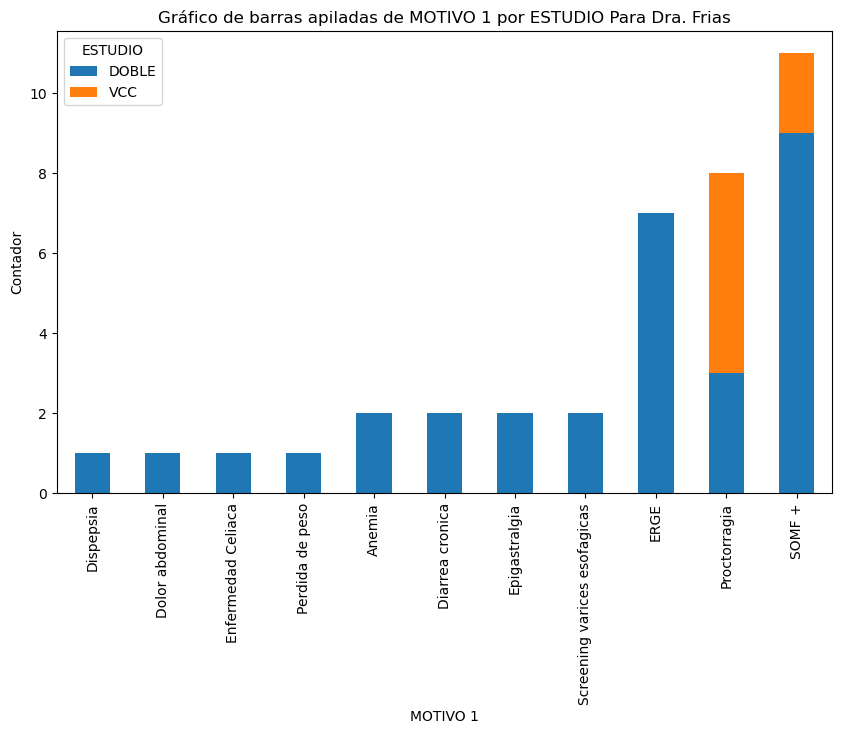

In [56]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Supongamos que tu DataFrame ya fue creado y se llama df  
# Crear una tabla de contingencia que cuenta las ocurrencias  
df_grouped = df[df['SOLICITANTE'] == 'Dra. Frias'].groupby(['MOTIVO 1', 'ESTUDIO']).size().unstack(fill_value=0)  

# Calcular la suma para cada 'MOTIVO 1' (para el ordenamiento)  
df_grouped['Total'] = df_grouped.sum(axis=1)  

# Ordenar el DataFrame por el Total en orden decreciente  
df_grouped = df_grouped.sort_values(by='Total', ascending=True)  

# Eliminar la columna 'Total' antes de graficar  
df_grouped = df_grouped.drop(columns='Total')  

# Graficar  
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))  

# Añadir título y etiquetas  
plt.title('Gráfico de barras apiladas de MOTIVO 1 por ESTUDIO Para Dra. Frias')  
plt.xlabel('MOTIVO 1')  
plt.ylabel('Contador')  
plt.legend(title='ESTUDIO')  

# Mostrar el gráfico  
plt.show()  

### Estadisticas de Cantidad de Personas Solicitantes

In [57]:
## Estadisticas de estudios solicitados

# Agrupar por fecha y contar ocurrencias
cantidad_por_fecha = df.groupby('Fecha inscripcion').size().reset_index(name='quantity')

# Calcular acumulado
cantidad_por_fecha['acumulado'] = cantidad_por_fecha['quantity'].cumsum()


cantidad_por_fecha

,Fecha inscripcion,quantity,acumulado
0,2022-01-01,247,247
1,2023-01-01,52,299
2,2023-06-14,3,302
3,2023-06-21,12,314
4,2023-07-04,3,317
...,...,...,...
72,2024-11-20,4,833
73,2024-11-25,1,834
74,2024-11-27,11,845
75,2024-12-04,8,853


<Axes: xlabel='Fecha inscripcion', ylabel='quantity'>

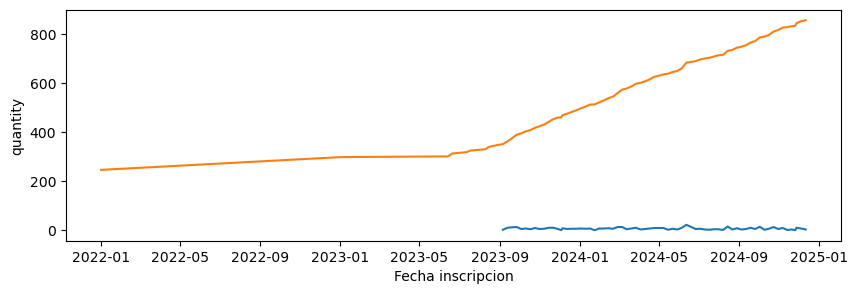

In [58]:
plt.figure(figsize=(10, 3))


sns.lineplot(data=cantidad_por_fecha[cantidad_por_fecha['Fecha inscripcion']>= '2023-09-01'], x= 'Fecha inscripcion', y = 'quantity')

sns.lineplot(data=cantidad_por_fecha, x= 'Fecha inscripcion', y = 'acumulado')

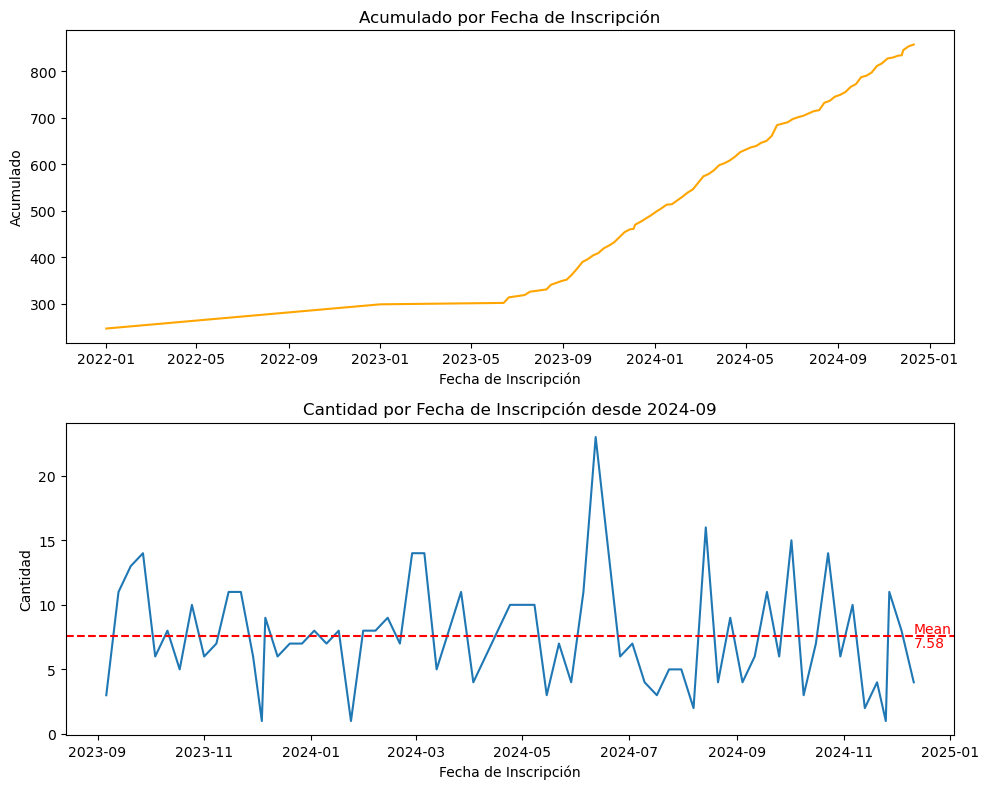

In [59]:

# Crear la figura y los subgráficos
plt.figure(figsize=(10, 8))  # Aumentar la altura para más espacio

# Primer gráfico: Line plot de acumulado
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, 2ª posición
sns.lineplot(data=cantidad_por_fecha, x='Fecha inscripcion', y='acumulado', color='orange')
plt.title('Acumulado por Fecha de Inscripción')  # Título del gráfico
plt.xlabel('Fecha de Inscripción')  # Etiqueta del eje X
plt.ylabel('Acumulado')  # Etiqueta del eje Y


# Segundo gráfico: Line plot de quantity
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, 1ª posición



# Filtrar las fechas desde el 2023-09-01
filtered_data = cantidad_por_fecha[cantidad_por_fecha['Fecha inscripcion'] >= '2023-09-01']
# Calcular el promedio de 'quantity'
quantity_mean = filtered_data['quantity'].mean()


sns.lineplot(data=filtered_data, x='Fecha inscripcion', y='quantity')
plt.axhline(y=quantity_mean, color='red', linestyle='--', label=f"Promedio ({quantity_mean:.2f})")  # Línea de promedio

plt.title('Cantidad por Fecha de Inscripción desde 2024-09')  # Título del gráfico
plt.xlabel('Fecha de Inscripción')  # Etiqueta del eje X
plt.ylabel('Cantidad')  # Etiqueta del eje Y

# Añadir el valor del promedio encima y debajo de la línea
plt.text(x=filtered_data['Fecha inscripcion'].max(), y=quantity_mean, 
         s=f"Mean", color='red', va='bottom', ha='left', fontsize=10)

plt.text(x=filtered_data['Fecha inscripcion'].max(), y=quantity_mean, 
         s=f"{quantity_mean:.2f}", color='red', va='top', ha='left', fontsize=10)



# Ajustar el layout
plt.tight_layout()
plt.show()

### Estudio de Cantidad de Estudios Solicitados

In [60]:
import numpy as np 


df_estudios_tipo = df[['Fecha inscripcion','ESTUDIO']]

#Creo la columna condicional 
df_estudios_tipo['cantidad_estudios'] =  np.select([ df['ESTUDIO'] == 'VCC',   
                                                df['ESTUDIO'] == 'VEDA',
                                                df['ESTUDIO'] == 'DOBLE'
                                                ],[1, 1, 2] , default=0)

df_estudios_tipo = df_estudios_tipo.groupby(['Fecha inscripcion','ESTUDIO'])['cantidad_estudios'].sum().reset_index()

# Calcular la suma acumulada de 'cantidad_estudios' por 'Fecha inscripcion' y 'ESTUDIO'
df_estudios_tipo['suma_acumulada_por_estudio'] = df_estudios_tipo.groupby(['ESTUDIO'])['cantidad_estudios'].cumsum()

# DF solo de estudios 

# Agrupar por 'Fecha inscripcion' para obtener la cantidad diaria y luego calcular la suma acumulada
df_estudios = df_estudios_tipo.groupby('Fecha inscripcion')['cantidad_estudios'].sum().reset_index()

df_estudios['suma_acumulada'] = df_estudios['cantidad_estudios'].cumsum()



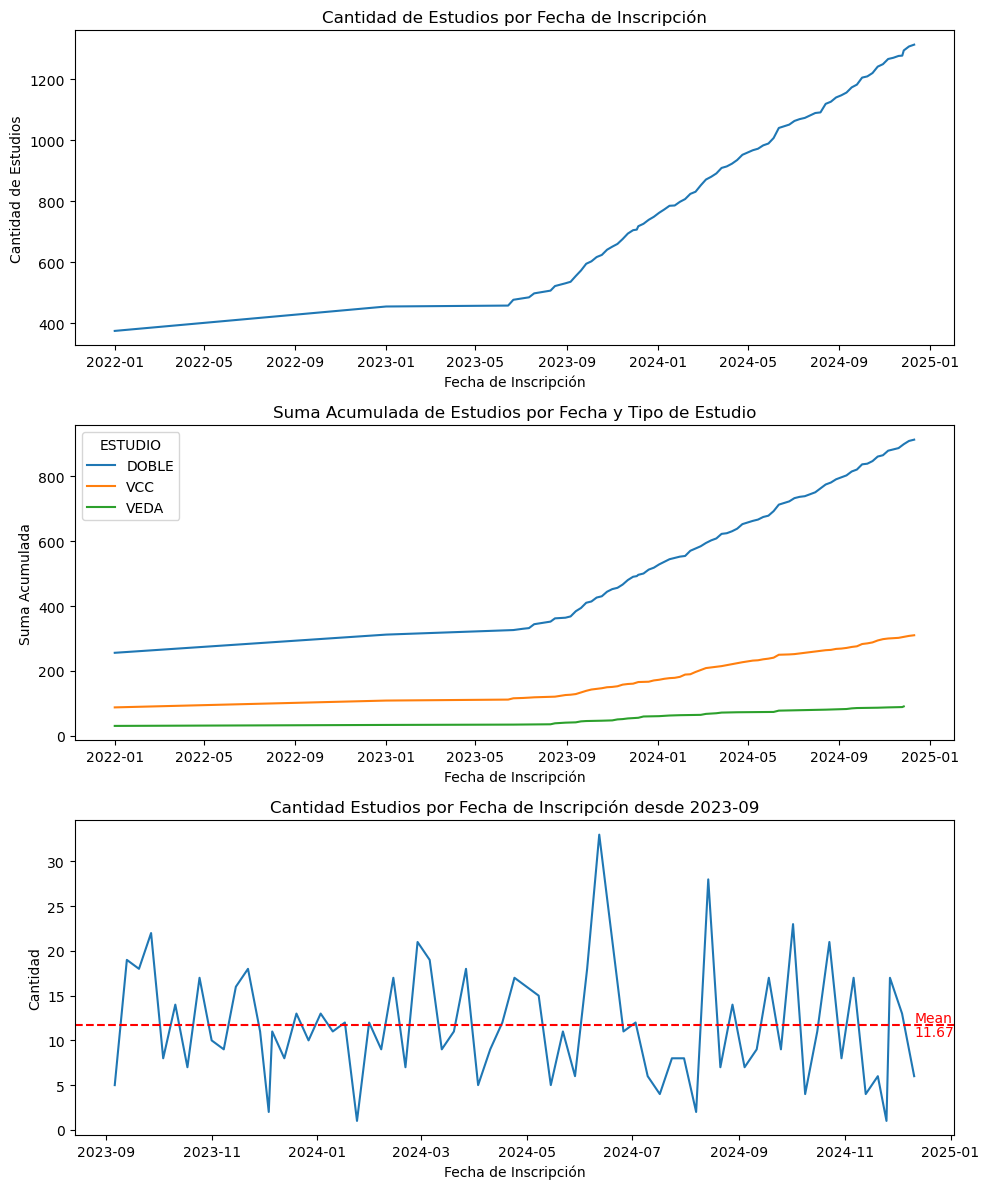

In [61]:
# Crear los gráficos
plt.figure(figsize=(10, 12))

# Primer gráfico: Cantidad de estudios por fecha
plt.subplot(3, 1, 1)  # 2 filas, 1 columna, 1ª posición
sns.lineplot(data=df_estudios, x='Fecha inscripcion', y='suma_acumulada')
plt.title('Cantidad de Estudios por Fecha de Inscripción')
plt.xlabel('Fecha de Inscripción')
plt.ylabel('Cantidad de Estudios')

# Segundo gráfico: Suma acumulada por fecha, desglosado por tipo de estudio
plt.subplot(3, 1, 2)  # 2 filas, 1 columna, 2ª posición
sns.lineplot(data=df_estudios_tipo, x='Fecha inscripcion', y='suma_acumulada_por_estudio', hue='ESTUDIO')
plt.title('Suma Acumulada de Estudios por Fecha y Tipo de Estudio')
plt.xlabel('Fecha de Inscripción')
plt.ylabel('Suma Acumulada')


# Tercer gráfico: Cantidad de estudios por fecha a partrir de 2023-09-01
plt.subplot(3, 1, 3)  # 2 filas, 1 columna, 2ª posición
# Filtrar las fechas desde el 2023-09-01
filtered_data = df_estudios[cantidad_por_fecha['Fecha inscripcion'] >= '2023-09-01']
# Calcular el promedio de 'quantity'
quantity_mean = filtered_data['cantidad_estudios'].mean()


sns.lineplot(data=filtered_data, x='Fecha inscripcion', y='cantidad_estudios')
plt.axhline(y=quantity_mean, color='red', linestyle='--', label=f"Promedio ({quantity_mean:.2f})")  # Línea de promedio

plt.title('Cantidad Estudios por Fecha de Inscripción desde 2023-09')  # Título del gráfico
plt.xlabel('Fecha de Inscripción')  # Etiqueta del eje X
plt.ylabel('Cantidad')  # Etiqueta del eje Y

# Añadir el valor del promedio encima y debajo de la línea
plt.text(x=filtered_data['Fecha inscripcion'].max(), y=quantity_mean, 
         s=f"Mean", color='red', va='bottom', ha='left', fontsize=10)

plt.text(x=filtered_data['Fecha inscripcion'].max(), y=quantity_mean, 
         s=f"{quantity_mean:.2f}", color='red', va='top', ha='left', fontsize=10)




# Ajuste de diseño para evitar superposición
plt.tight_layout()
plt.show()